**Phishing URL Detection Using Machine Learning**


---> **Objective**

The primary objective of this project is to develop a machine learning-based system to detect phishing URLs by analyzing various syntactic and structural features extracted from web addresses. The system aims to distinguish between legitimate and phishing websites using automated learning techniques, contributing to cybersecurity defenses.


---> **Aim**

To build a robust and interpretable model that can classify URLs into
phishing or benign categories.

To perform comprehensive data preprocessing for feature transformation, handling outliers, reducing skewness, and standardizing the dataset to ensure optimal model performance.

To use real-world data (PhiUSIIL dataset) and extract meaningful patterns from URL characteristics like: URL length, Number of JavaScript/CSS/Image tags,TLD (Top-Level Domain),Domain structure and encoding patterns.






---> **Significance of the Project**


Cybersecurity Relevance: Phishing attacks remain one of the most widespread cyber threats. Detecting phishing URLs at scale helps prevent financial fraud, identity theft, and malware distribution.

Automation: Manual inspection of suspicious URLs is infeasible at web-scale. Machine learning enables real-time detection with high accuracy.

Interpretability: By analyzing handcrafted features (rather than only relying on black-box deep models), the system offers insights into why a URL is flagged as phishing.



---> **Importance of Preprocessing in Machine Learning**


In machine learning, data preprocessing is a foundational step that significantly influences model performance, accuracy, and generalizability. Raw data collected from real-world sources is often noisy, inconsistent, skewed, or incomplete. Preprocessing transforms this raw input into a clean, structured and meaningful format by handling missing values, removing outliers, scaling numerical features, encoding categorical variables, and reducing skewness. These steps ensure that the learning algorithms can focus on relevant patterns without being misled by anomalies or scale differences. Without proper preprocessing, even the most advanced algorithms can yield poor results, as models may overfit noise or fail to converge effectively. Thus, preprocessing bridges the gap between raw data and effective learning, making it an essential part of any machine learning pipeline.



**Preprocessing of Dataset: Keysteps invloved-**

Importing of dataset

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')


Saving PhiUSIIL_Phishing_URL_Dataset.csv to PhiUSIIL_Phishing_URL_Dataset.csv


Quality check on the dataset: preview and eliminating duplicate values, handling null values and outliers

In [4]:
# Overview of structure, types, and non-null counts
print(" Data Info:")
df.info()

#  First few rows
print("\n Preview of Data:")
display(df.head())


# Check for duplicate columns
duplicate_columns = df.T[df.T.duplicated()].T

print(f"Number of duplicate columns: {duplicate_columns.shape[1]}")
if duplicate_columns.shape[1] > 0:
    print("Duplicate columns found:")
    print(duplicate_columns.columns.tolist())
else:
    print("✅ No duplicate columns found.")





 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  Ha

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


Number of duplicate columns: 0
✅ No duplicate columns found.


| Feature           | Mean  | Max   | Min | Std Dev |
| ----------------- | ----- | ----- | --- | ------- |
| `URLLength`       | 34.57 | 6097  | 13  | 41.31   |
| `NoOfImage`       | 26.07 | 8956  | 0   | 79.41   |
| `NoOfJS`          | 10.52 | 6957  | 0   | 22.31   |
| `NoOfSelfRef`     | 65.07 | 27397 | 0   | 176.69  |
| `NoOfExternalRef` | 49.26 | 27516 | 0   | 161.03  |
 So using box plots and Normalization methods to overcome these large gaps in statistical values. Difference from mean to max values is very high in these cases.

Checking the statistical parameters supporting a robust dataset

In [5]:
# Summary statistics for numeric columns
print("\n Summary Statistics:")
display(df.describe())

#  Null value count per column
print("\n Null Values Per Column:")
null_counts = df.isnull().sum()
display(null_counts[null_counts > 0].sort_values(ascending=False))



#  Percentage of nulls
print("\n Null Value Percentages:")
null_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
display(null_percent[null_percent > 0])



 Summary Statistics:


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000



 Null Values Per Column:


,0



 Null Value Percentages:


,0


Anaysing the data and outlier concentration through Box Plot

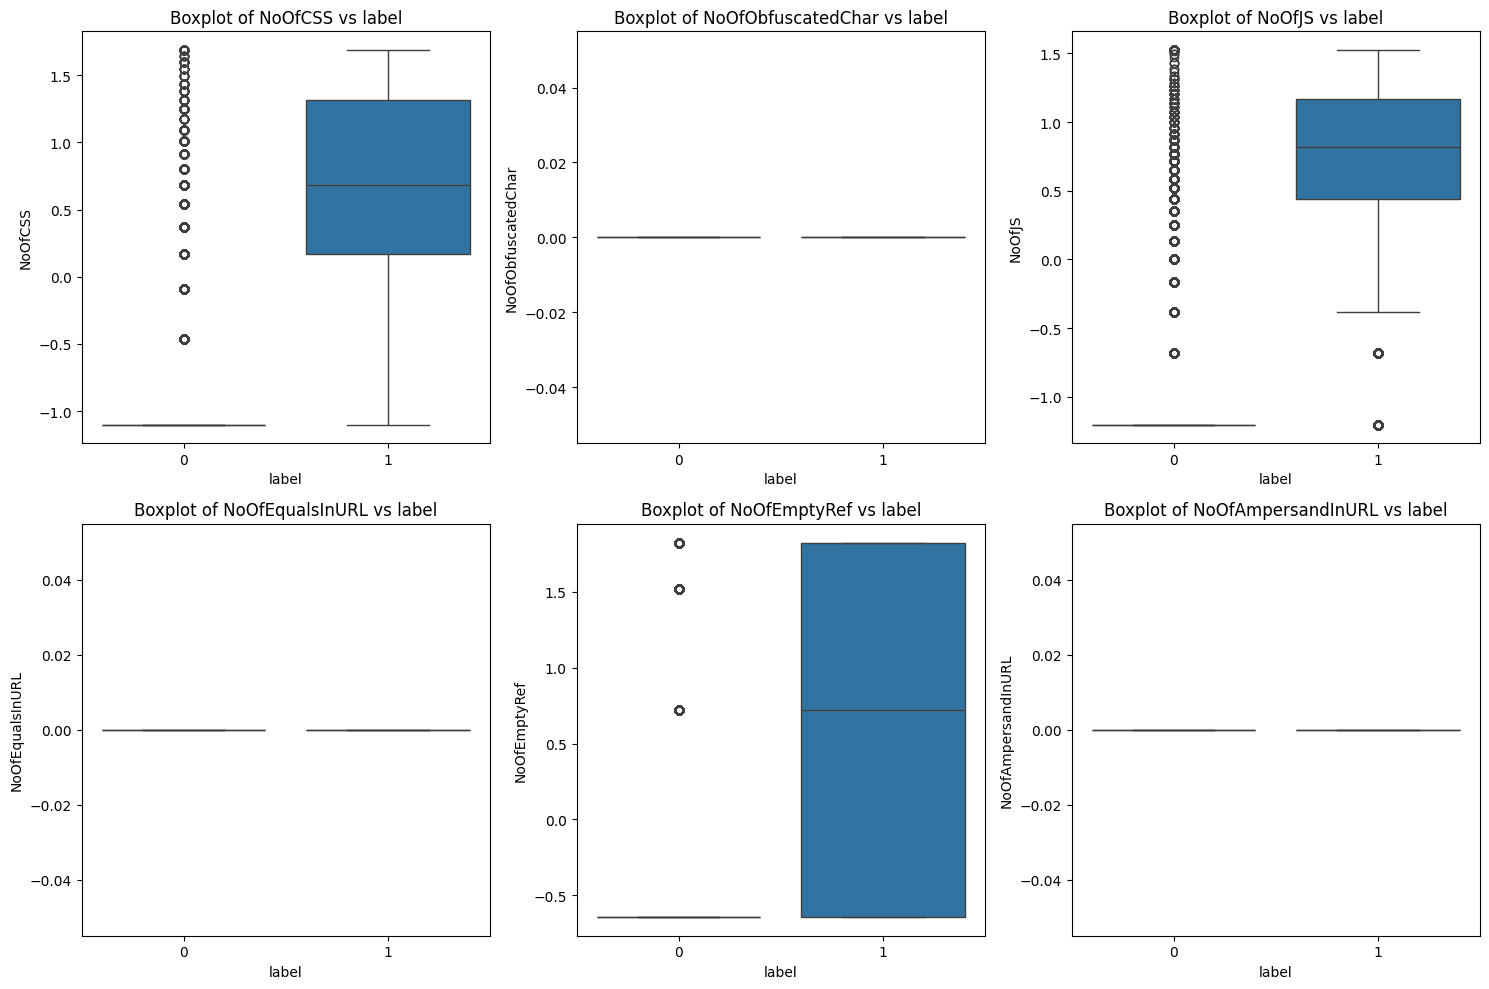

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  Plot boxplots of most skewed features
top_skewed = skew_scores.head(6).index.tolist()  # Take top 6 for plotting

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_skewed, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Boxplot of {col} vs label')
    plt.tight_layout()

plt.show()

Common outlier handling method: upon checking skewness and bringing it to required range by scaling and normalising.

IQR = Interquartile Range
It measures the spread of the middle 50% of the data:

IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1
Where:

Q1 (25th percentile) = value below which 25% of the data falls

Q3 (75th percentile) = value below which 75% of the data falls.


We use IQR to identify outliers:

Any value below Q1 − 1.5×IQR → is an outlier

Any value above Q3 + 1.5×IQR → is an outlier

This is the foundation of boxplots. The box itself is the IQR, and whiskers are up to those bounds. Points beyond are plotted as circles (outliers).



Check the skewness of the raw dataset for various features.

In [8]:
import pandas as pd

# Step 1: Select only numeric features (excluding label)
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')

# Step 2: Compute skewness
skew_scores = num_cols.skew().sort_values(ascending=False)

# Step 3: Get top 30 most skewed features
top_30_skewed = skew_scores.head(30).index.tolist()

print("Top 30 Most Skewed Features:\n")
for i, feature in enumerate(top_30_skewed, 1):
    print(f"{i}. {feature} (Skewness: {skew_scores[feature]:.2f})")


Top 30 Most Skewed Features:

1. NoOfCSS (Skewness: 464.40)
2. NoOfObfuscatedChar (Skewness: 204.68)
3. NoOfJS (Skewness: 140.44)
4. NoOfEqualsInURL (Skewness: 114.99)
5. NoOfEmptyRef (Skewness: 106.83)
6. NoOfAmpersandInURL (Skewness: 106.72)
7. NoOfiFrame (Skewness: 97.68)
8. NoOfDegitsInURL (Skewness: 94.88)
9. NoOfPopup (Skewness: 84.95)
10. NoOfExternalRef (Skewness: 65.90)
11. NoOfSelfRef (Skewness: 60.38)
12. NoOfLettersInURL (Skewness: 58.40)
13. URLLength (Skewness: 53.32)
14. LineOfCode (Skewness: 53.07)
15. LargestLineLength (Skewness: 48.18)
16. NoOfOtherSpecialCharsInURL (Skewness: 47.43)
17. ObfuscationRatio (Skewness: 40.12)
18. NoOfImage (Skewness: 28.23)
19. HasObfuscation (Skewness: 21.98)
20. IsDomainIP (Skewness: 19.15)
21. NoOfQMarkInURL (Skewness: 8.16)
22. Crypto (Skewness: 6.29)
23. NoOfSelfRedirect (Skewness: 4.69)
24. HasExternalFormSubmit (Skewness: 4.45)
25. DegitRatioInURL (Skewness: 3.24)
26. HasPasswordField (Skewness: 2.63)
27. DomainLength (Skewness: 2.

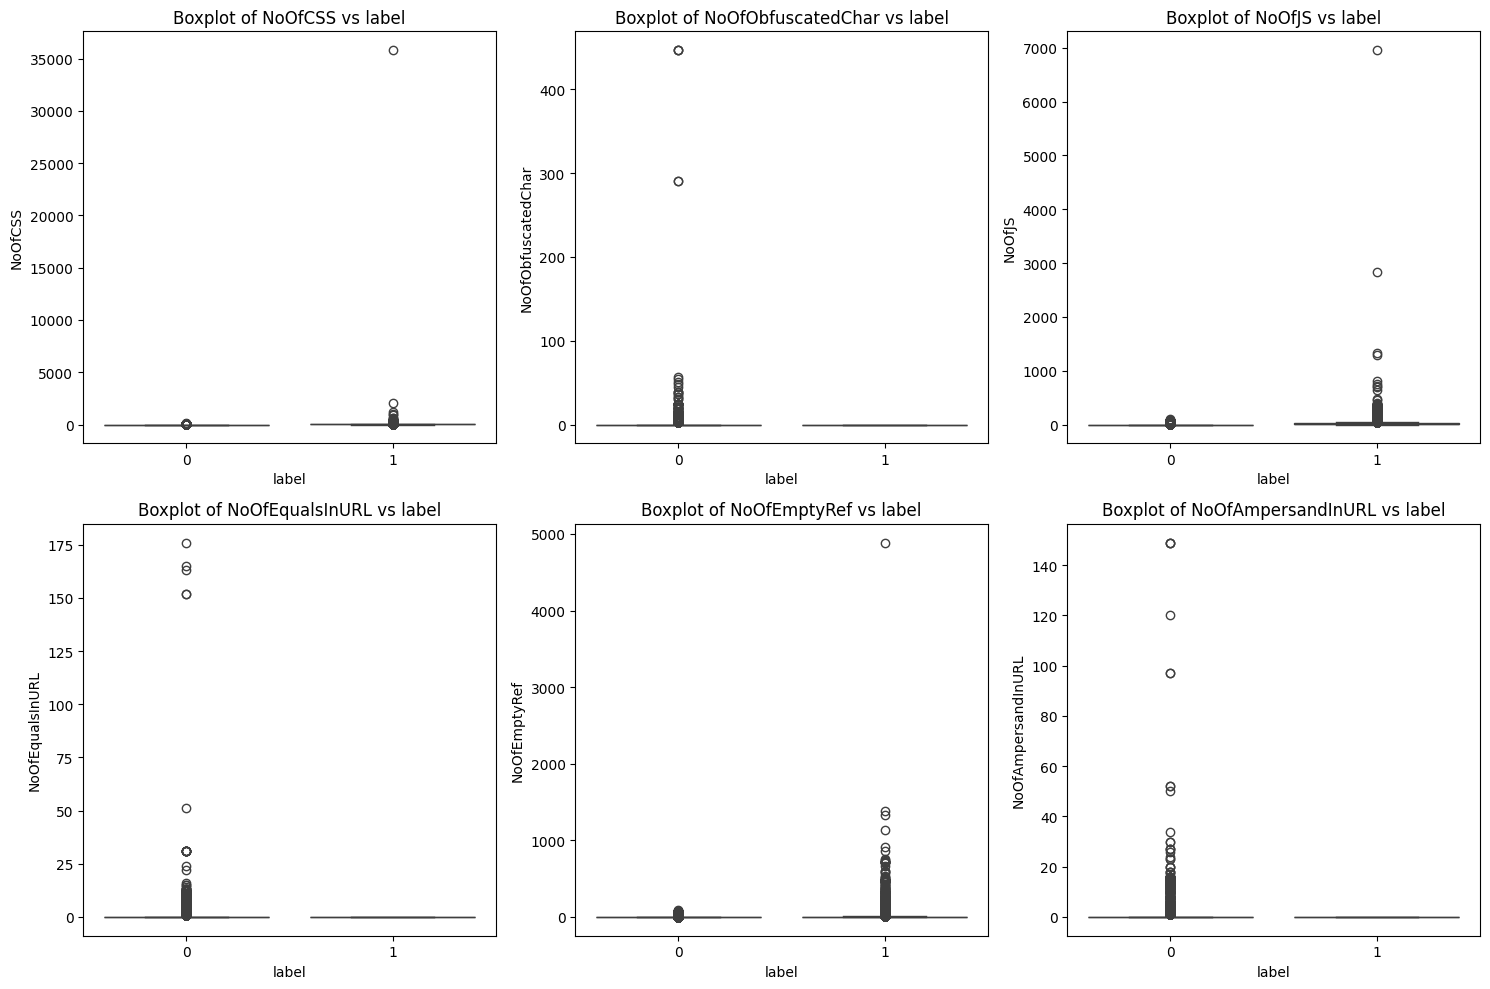

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Drop non-numeric & label for skewness calc
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')



#  Plot boxplots of most skewed features
top_skewed = skew_scores.head(6).index.tolist()  # Take top 6 for plotting

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_skewed, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Boxplot of {col} vs label')
    plt.tight_layout()

plt.show()

Comparison of raw vs clipped data after IQR method

--constant values might not lead to proper learning. So fetaure selection is being enabled through preprocessing here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset and deep copy for reference
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
original_df = df.copy(deep=True)

# Step 2: Select numeric columns (excluding label)
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')

# Step 3: Calculate skewness and get top 30 skewed features
skew_scores = num_cols.skew().sort_values(ascending=False)
top_30_skewed = skew_scores.head(30).index.tolist()

# Step 4: IQR Clipping
valid_features = []
print(" Clipping Summary:\n")
for col in top_30_skewed:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)  # avoid negative for count-based
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

    if df[col].nunique() > 1:
        valid_features.append(col)
        print(f"{col}: Clipped to [{lower:.2f}, {upper:.2f}] ")
    else:
        print(f"{col}: Clipped to [{lower:.2f}, {upper:.2f}]  dropped (constant)")

print(f"\n Total usable features after clipping: {len(valid_features)}")
print("Usable features:\n", valid_features)

# Step 5: Skewness comparison before vs after clipping
skew_before = original_df[valid_features].skew().sort_values(ascending=False)
skew_after = df[valid_features].skew().sort_values(ascending=False)

skew_comparison = pd.DataFrame({
    'Skewness Before': skew_before,
    'Skewness After': skew_after
}).sort_values(by='Skewness Before', ascending=False)

# Display final result
print("\n Skewness Comparison (Before vs After Clipping):")
print(skew_comparison.round(2))


📦 Clipping Summary:

NoOfCSS: Clipped to [0.00, 20.00] 
NoOfObfuscatedChar: Clipped to [0.00, 0.00]  dropped (constant)
NoOfJS: Clipped to [0.00, 37.50] 
NoOfEqualsInURL: Clipped to [0.00, 0.00]  dropped (constant)
NoOfEmptyRef: Clipped to [0.00, 2.50] 
NoOfAmpersandInURL: Clipped to [0.00, 0.00]  dropped (constant)
NoOfiFrame: Clipped to [0.00, 2.50] 
NoOfDegitsInURL: Clipped to [0.00, 0.00]  dropped (constant)
NoOfPopup: Clipped to [0.00, 0.00]  dropped (constant)
NoOfExternalRef: Clipped to [0.00, 141.00] 
NoOfSelfRef: Clipped to [0.00, 220.00] 
NoOfLettersInURL: Clipped to [0.00, 35.00] 
URLLength: Clipped to [6.50, 50.50] 
LineOfCode: Clipped to [0.00, 3165.50] 
LargestLineLength: Clipped to [0.00, 19817.50] 
NoOfOtherSpecialCharsInURL: Clipped to [0.00, 6.00] 
ObfuscationRatio: Clipped to [0.00, 0.00]  dropped (constant)
NoOfImage: Clipped to [0.00, 72.50] 
HasObfuscation: Clipped to [0.00, 0.00]  dropped (constant)
IsDomainIP: Clipped to [0.00, 0.00]  dropped (constant)
NoOfQMar

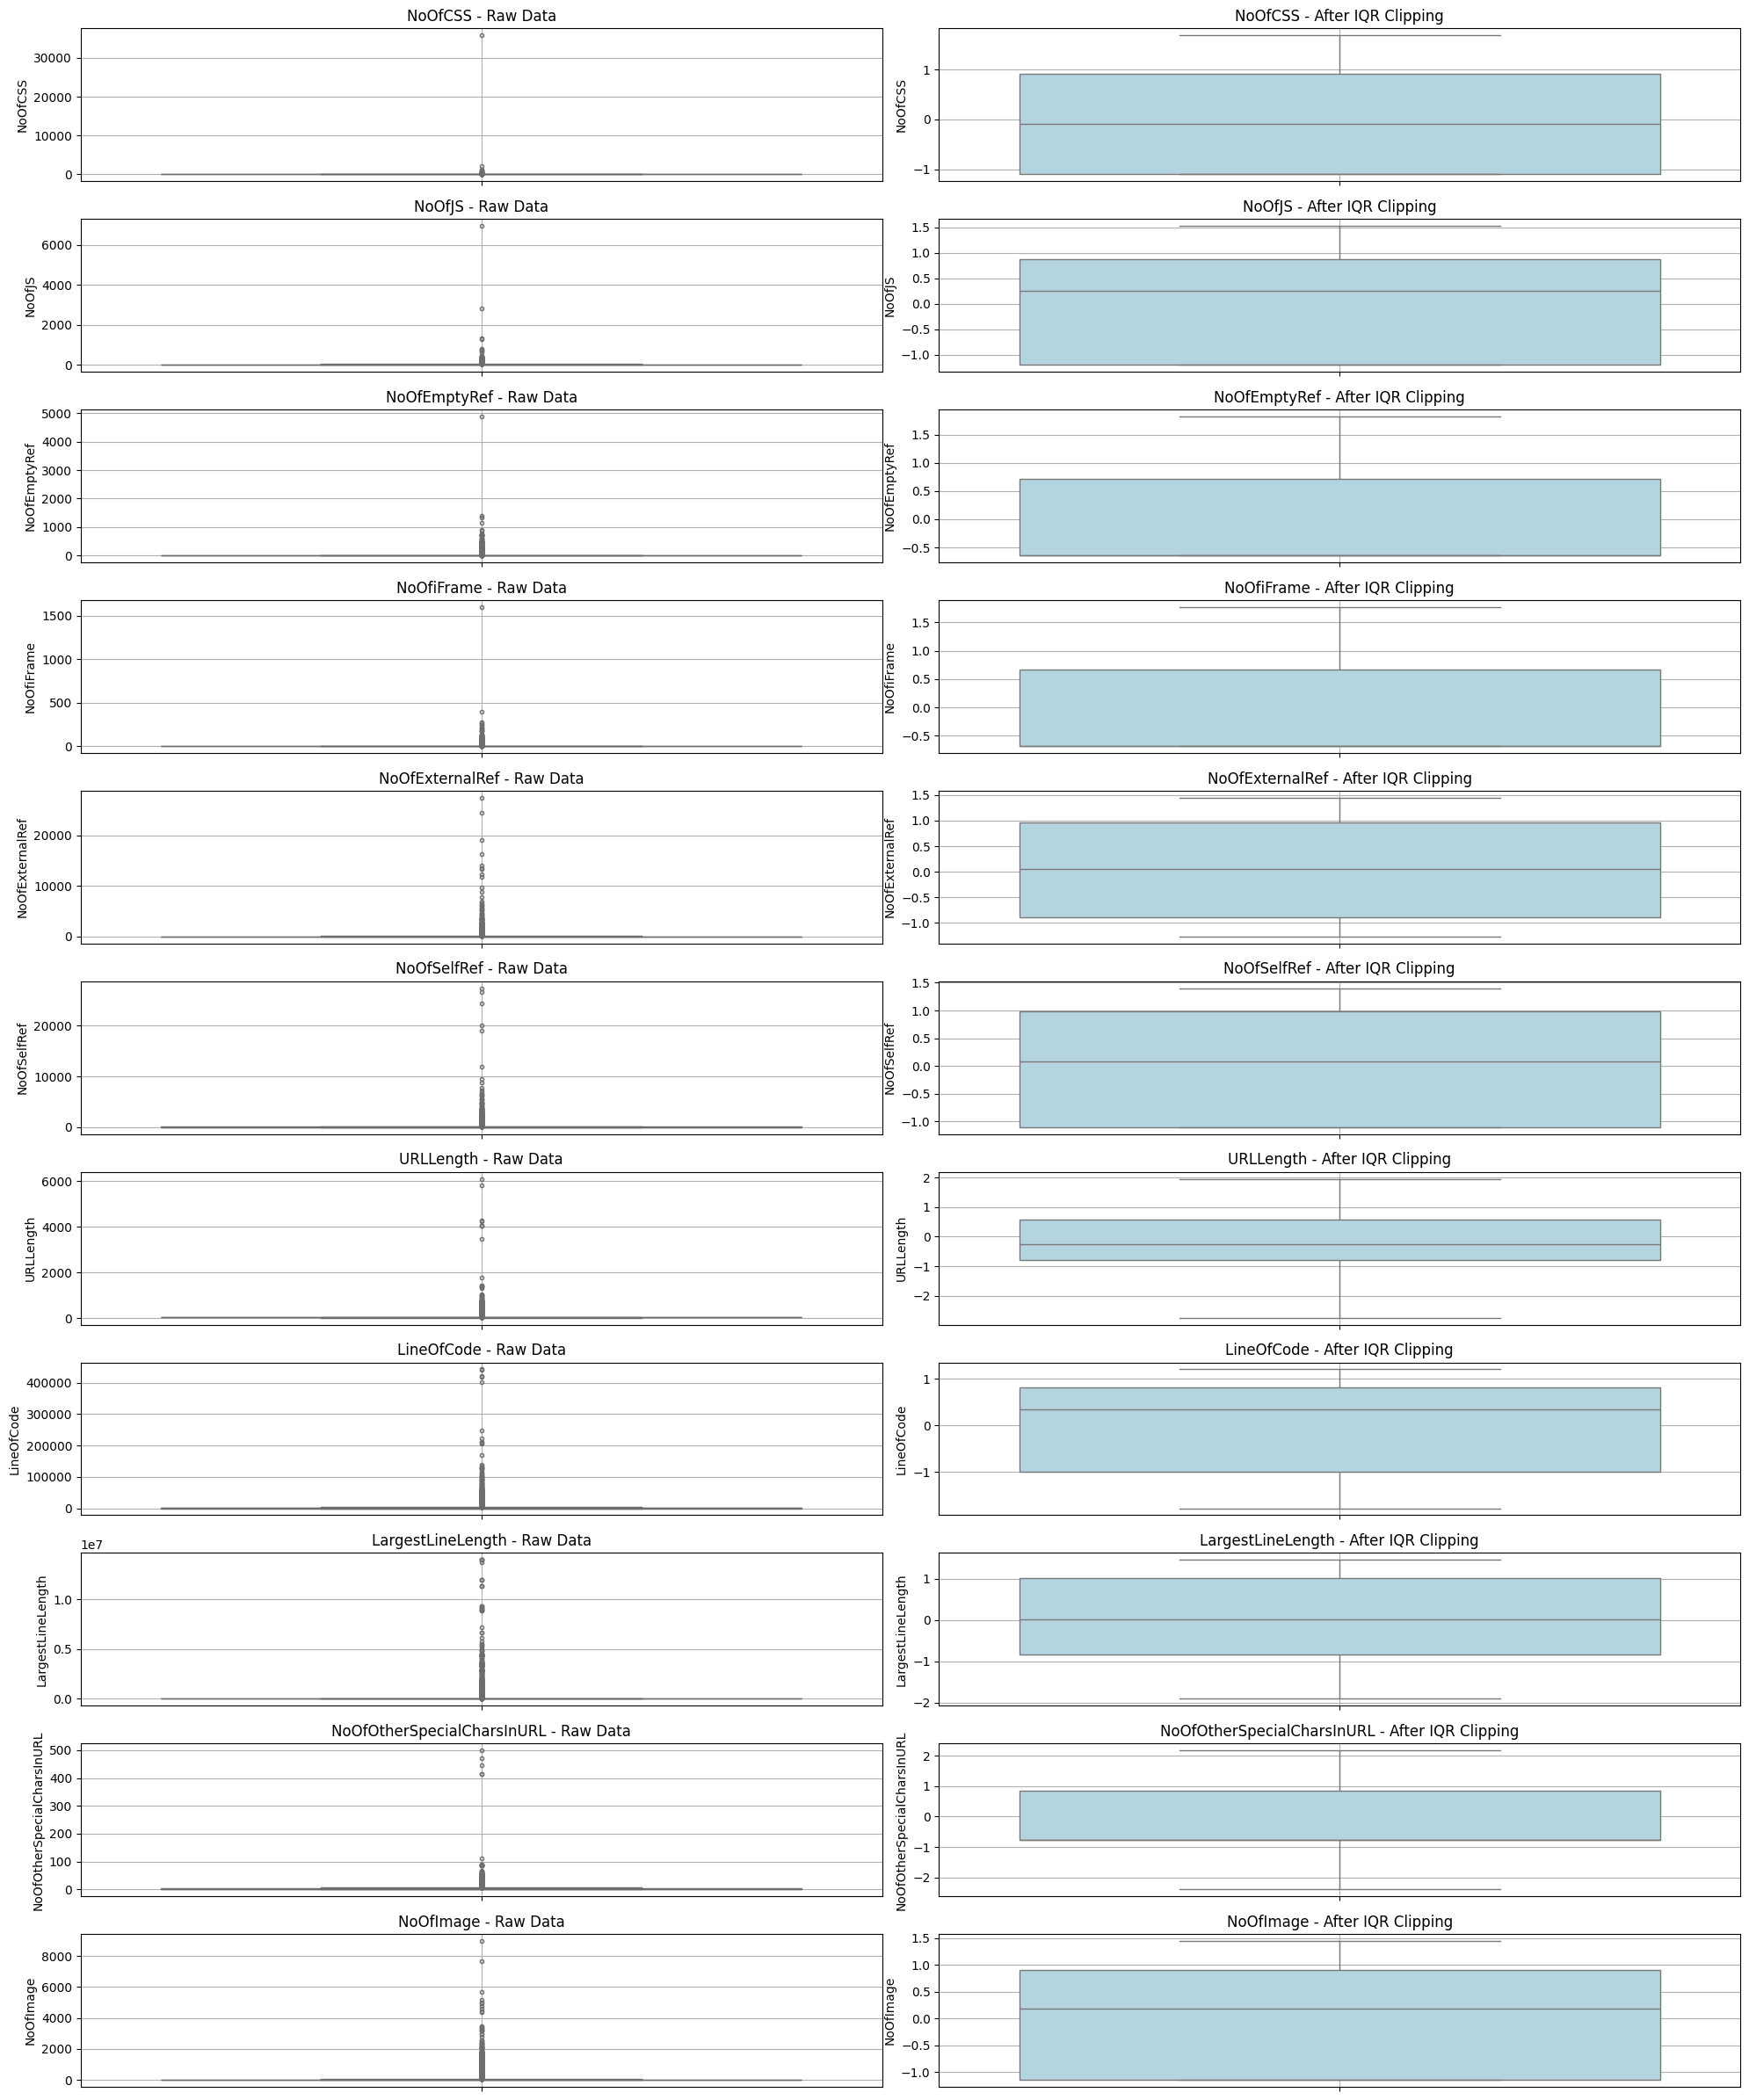

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features you applied clipping to
compare_features = [
    'NoOfCSS', 'NoOfJS', 'NoOfEmptyRef', 'NoOfiFrame',
    'NoOfExternalRef', 'NoOfSelfRef', 'URLLength',
    'LineOfCode', 'LargestLineLength',
    'NoOfOtherSpecialCharsInURL', 'NoOfImage'
]



clipped_df = df.copy()

plt.figure(figsize=(20, 24))
for i, col in enumerate(compare_features):
    plt.subplot(len(compare_features), 2, 2*i + 1)
    sns.boxplot(y=original_df[col], color='salmon', fliersize=3)
    plt.title(f"{col} - Raw Data")
    plt.grid(True)

    plt.subplot(len(compare_features), 2, 2*i + 2)
    sns.boxplot(y=clipped_df[col], color='lightblue', fliersize=3)
    plt.title(f"{col} - After IQR Clipping")
    plt.grid(True)

plt.tight_layout()
plt.show()


Desired skew results are yet to be obtained. So moving on with further preprocessing. Logarithmic transformation is being used.

In [3]:


# Step: Apply log1p only to features with skewness > 1
print("\n Applying log1p only to features with skew > 1 ...\n")
log_transformed_cols = []

skew_before_log = {}
skew_after_log = {}

for col in valid_features:
    skew_val = df[col].skew()
    if skew_val > 1:
        skew_before_log[col] = skew_val
        df[col] = np.log1p(df[col])  # log(1 + x)
        skew_after_log[col] = df[col].skew()
        log_transformed_cols.append(col)

# Step: Create comparison DataFrame
log_skew_comparison = pd.DataFrame({
    'Skewness Before Log': pd.Series(skew_before_log),
    'Skewness After Log': pd.Series(skew_after_log)
}).sort_values(by='Skewness Before Log', ascending=False)

# Display result
print(" Skewness Comparison (Only Log-Transformed Columns):")
print(log_skew_comparison.round(2))

print(f"\n Total columns log-transformed: {len(log_transformed_cols)}")
print("Transformed columns:\n", log_transformed_cols)



🔍 Applying log1p only to features with skew > 1 ...

 Skewness Comparison (Only Log-Transformed Columns):
                            Skewness Before Log  Skewness After Log
LargestLineLength                          1.45               -0.16
NoOfOtherSpecialCharsInURL                 1.43                1.00
NoOfCSS                                    1.30                0.29
NoOfExternalRef                            1.24                0.06
NoOfSelfRef                                1.22                0.07
LineOfCode                                 1.22               -0.58
NoOfImage                                  1.19                0.00
NoOfEmptyRef                               1.18                1.03
NoOfJS                                     1.14               -0.03
NoOfiFrame                                 1.06                0.90
URLLength                                  1.01                0.54

 Total columns log-transformed: 11
Transformed columns:
 ['NoOfCSS', 'NoOfJS

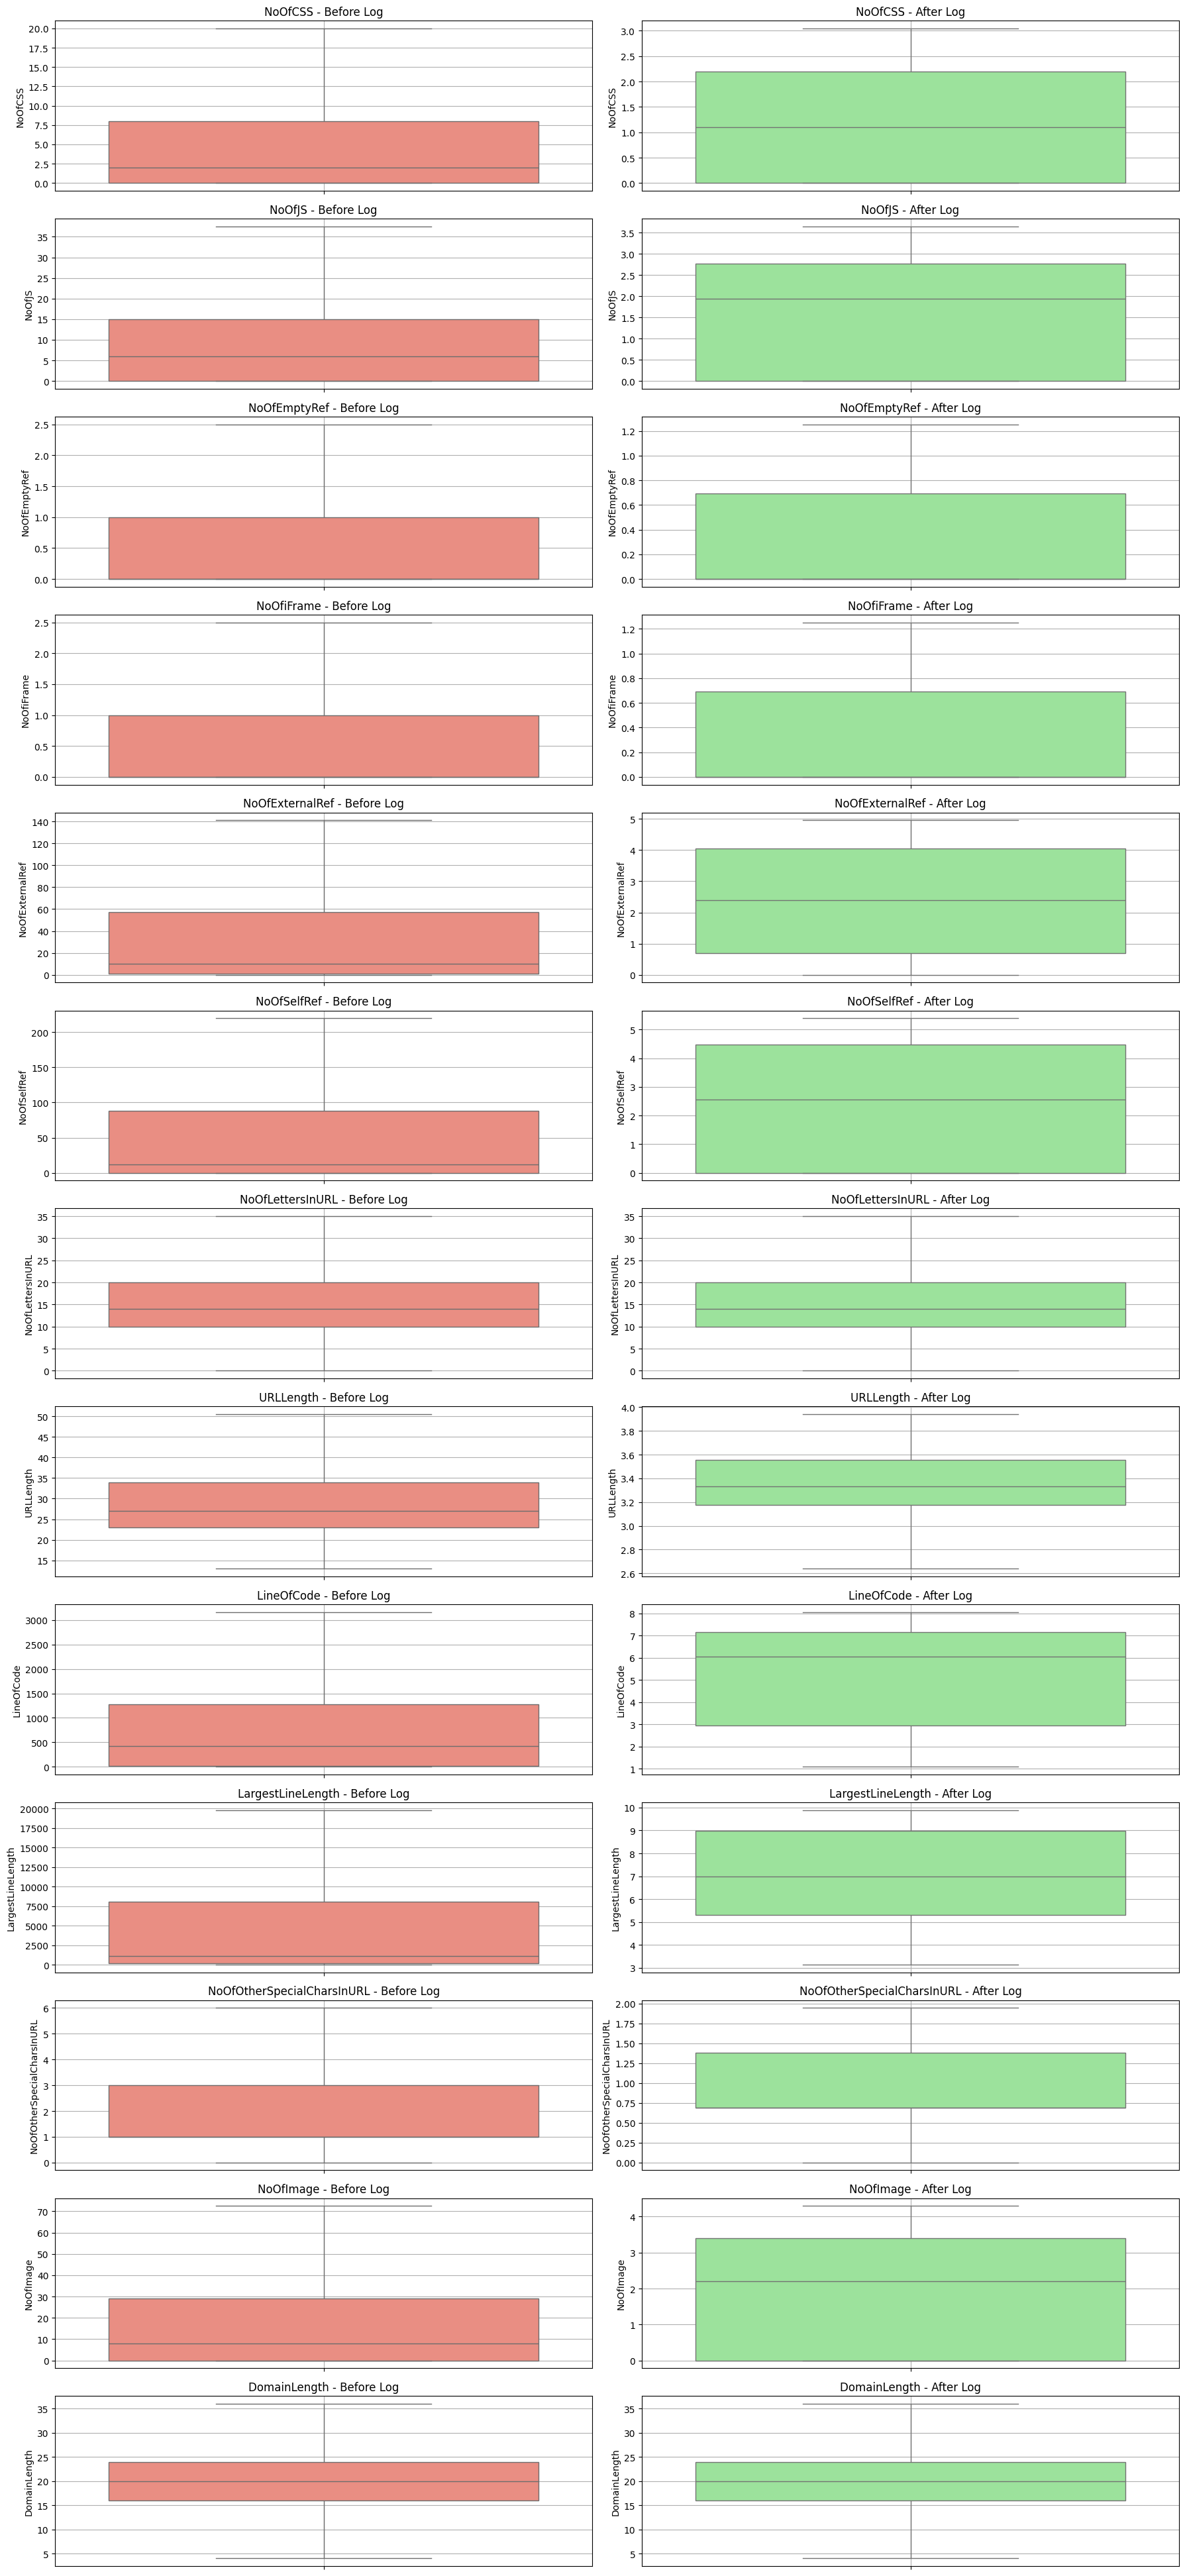

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate clipped version (before log)
clipped_df = original_df[valid_features].copy()
for col in valid_features:
    Q1 = clipped_df[col].quantile(0.25)
    Q3 = clipped_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)
    upper = Q3 + 1.5 * IQR
    clipped_df[col] = clipped_df[col].clip(lower=lower, upper=upper)

# comparing before and after log plots
plt.figure(figsize=(18, len(valid_features) * 3))

for i, col in enumerate(valid_features):
    # Left: Before log
    plt.subplot(len(valid_features), 2, 2 * i + 1)
    sns.boxplot(y=clipped_df[col], color='salmon', fliersize=2)
    plt.title(f'{col} - Before Log')
    plt.grid(True)

    # Right: After log
    plt.subplot(len(valid_features), 2, 2 * i + 2)
    sns.boxplot(y=df[col], color='lightgreen', fliersize=2)
    plt.title(f'{col} - After Log')
    plt.grid(True)

plt.tight_layout()
plt.show()


The categorical columns need to be converted into numerical columns and the process is termed as one hot encoding where labelling done seperately. Here the 5 objects during the initial inspection was found and it is undergoing One hot encoding.

In [5]:
# One-hot encode only the useful categorical column
one_hot = pd.get_dummies(df['TLD'], prefix='TLD')

# Concatenate to main dataframe
df_encoded = pd.concat([df, one_hot], axis=1)

# Drop the original categorical columns (and irrelevant ones)
df_encoded.drop(columns=['FILENAME', 'URL', 'Domain', 'Title', 'TLD'], inplace=True)

# Final structure
print(" Final dataframe shape after one-hot encoding:", df_encoded.shape)
df_encoded.head()


✅ Final dataframe shape after one-hot encoding: (235795, 746)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,3.465736,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,False,False,False,False,False,False,False,False,False,False
1,3.178054,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,False,False,False,False,False,False,False,False,False,False
2,3.401197,22,0,100.0,0.866667,0.028555,0.064129,2,1,0,...,False,False,False,False,False,False,False,False,False,False
3,3.295837,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,False,False,False,False,False,False,False,False,False,False
4,3.526361,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
from sklearn.preprocessing import StandardScaler

# Define which columns to scale
columns_to_scale = log_transformed_cols  # the 11 log-transformed numeric features
scaler = StandardScaler()

# Apply scaling only on those columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


After these steps, standarding the required features into a general layout is essential for a smooth curve balance.So z score method is used and the statistaical parameter change is analysed.

In [8]:
# Before scaling (on log-transformed, clipped data)
before_stats = original_df[columns_to_scale].describe().loc[['mean', 'std']].T
before_stats.columns = ['Mean Before', 'Std Before']

# After scaling
after_stats = df[columns_to_scale].describe().loc[['mean', 'std']].T
after_stats.columns = ['Mean After', 'Std After']

# Combine and display
stats_comparison = pd.concat([before_stats, after_stats], axis=1)
print("\n Z-Score Normalization Comparison (Mean & Std):")
display(stats_comparison.round(3))



 Z-Score Normalization Comparison (Mean & Std):


,Mean Before,Std Before,Mean After,Std After
NoOfCSS,6.333,74.866,0.0,1.0
NoOfJS,10.522,22.312,-0.0,1.0
NoOfEmptyRef,2.378,17.641,-0.0,1.0
NoOfiFrame,1.589,5.763,0.0,1.0
NoOfExternalRef,49.263,161.027,-0.0,1.0
NoOfSelfRef,65.071,176.688,0.0,1.0
URLLength,34.573,41.314,-0.0,1.0
LineOfCode,1141.900,3419.951,0.0,1.0
LargestLineLength,12789.533,152201.099,0.0,1.0
NoOfOtherSpecialCharsInURL,2.340,3.528,0.0,1.0


KDE plots after Z score evaluation

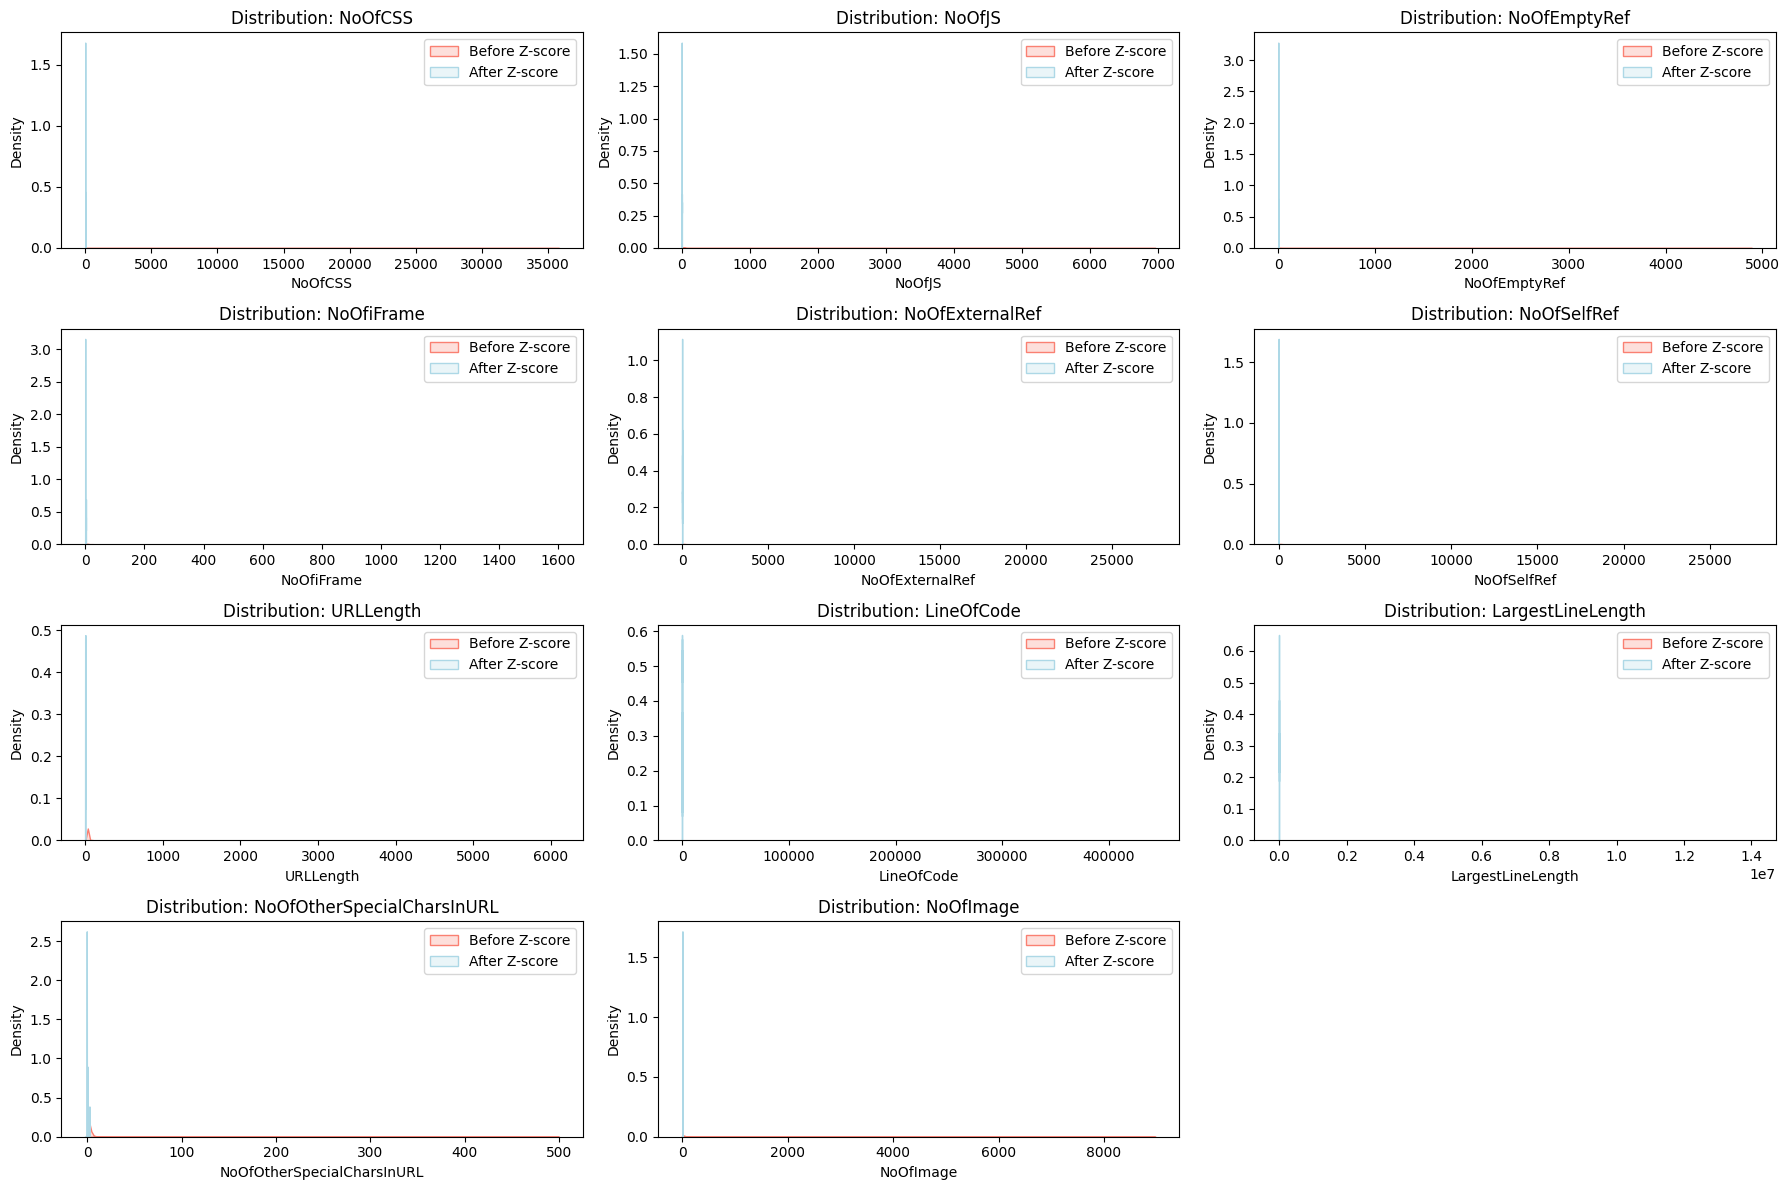

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
for i, col in enumerate(columns_to_scale):
    plt.subplot(4, 3, i + 1)

    sns.kdeplot(original_df[col], label='Before Z-score', fill=True, color='salmon')
    sns.kdeplot(df[col], label='After Z-score', fill=True, color='lightblue')

    plt.title(f'Distribution: {col}')
    plt.legend()
    plt.tight_layout()

plt.show()


In [12]:
# Final Preprocessing Checks and Confirmation

# 1. Check for missing values
missing_values = df.isnull().sum().sum()
print(f" Total missing values in dataset: {missing_values}")

# 2. Ensure label is integer
df['label'] = df['label'].astype(int)
print(" 'label' column converted to integer.")

# 3. Print shape of final DataFrame
print(f" Final shape of dataset (rows, columns): {df.shape}")

# 4. Preview final dataset
print("\n First few rows of final dataset:")
print(df.head())


 Total missing values in dataset: 0
 'label' column converted to integer.
 Final shape of dataset (rows, columns): (235795, 56)

 First few rows of final dataset:
     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com   0.241712   
1   31372.txt            https://www.uni-mainz.de  -0.794882   
2  597387.txt      https://www.voicefmradio.co.uk   0.009162   
3  554095.txt         https://www.sfnmjournal.com  -0.370479   
4  151578.txt  https://www.rewildingargentina.org   0.460158   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...

Comparison of box plots on raw vs processed dataset

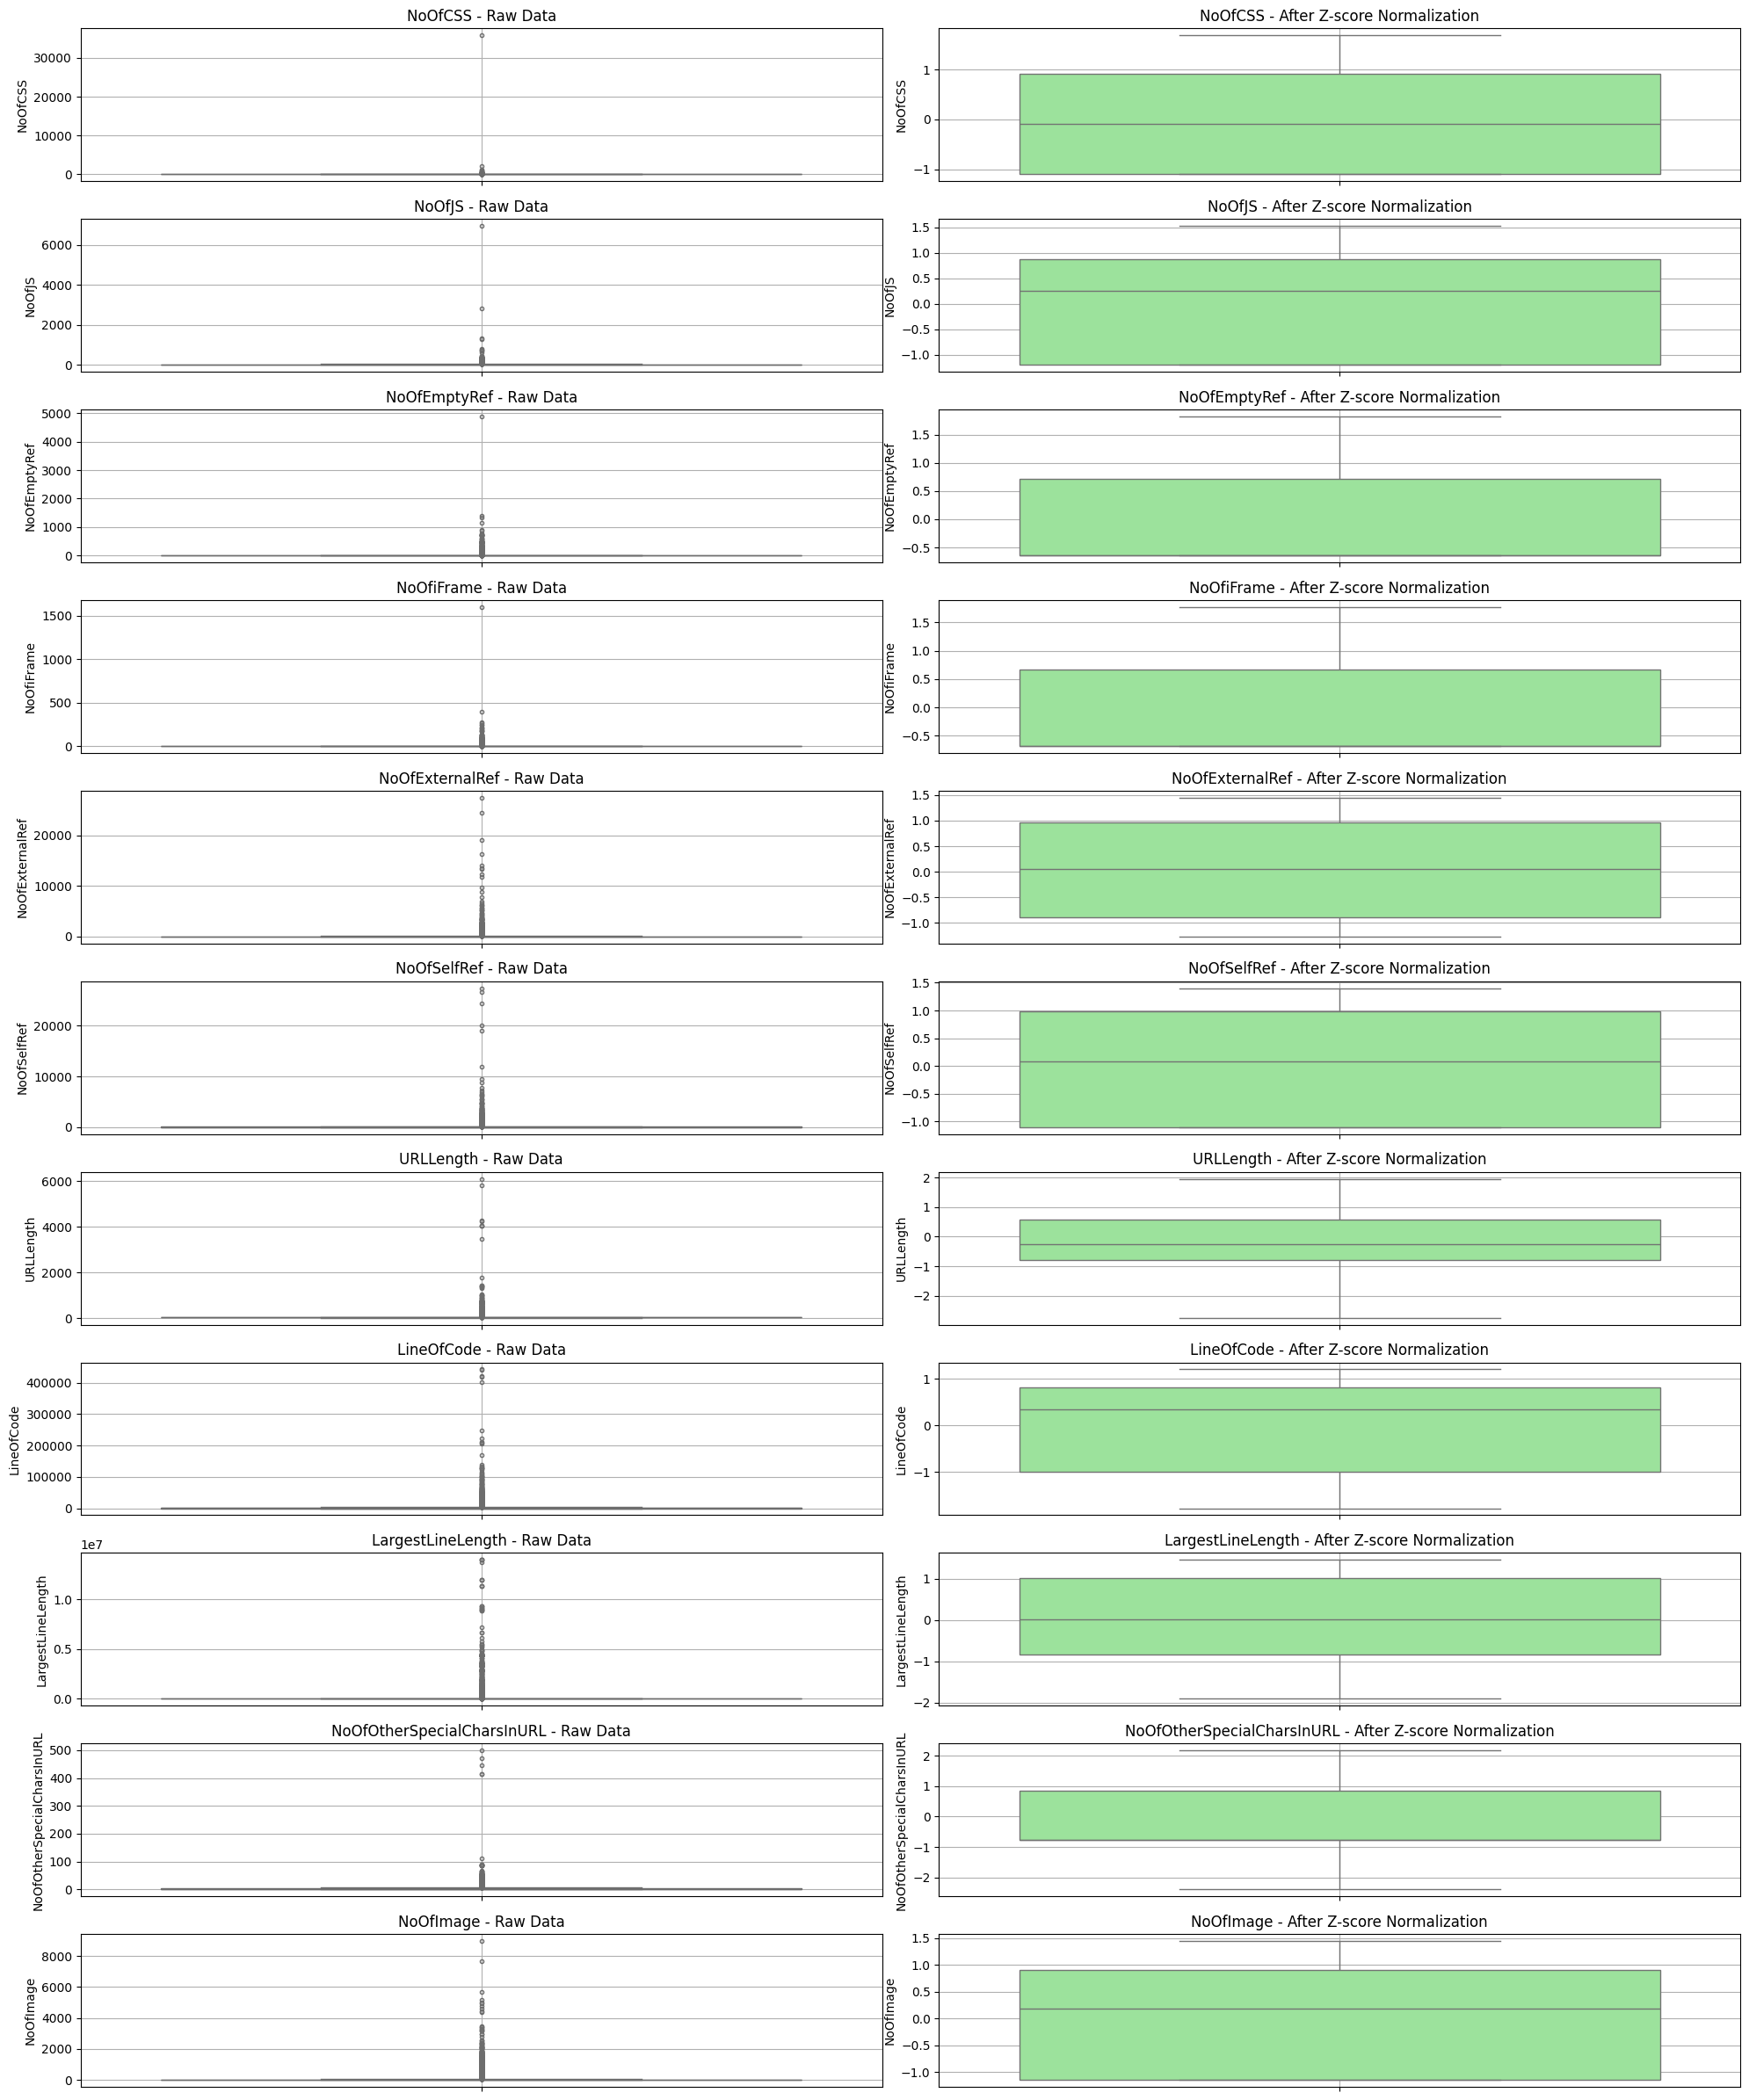

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features on which z-score was applied
z_scaled_features = [
    'NoOfCSS', 'NoOfJS', 'NoOfEmptyRef', 'NoOfiFrame',
    'NoOfExternalRef', 'NoOfSelfRef', 'URLLength',
    'LineOfCode', 'LargestLineLength',
    'NoOfOtherSpecialCharsInURL', 'NoOfImage'
]

plt.figure(figsize=(20, 24))
for i, col in enumerate(z_scaled_features):
    plt.subplot(len(z_scaled_features), 2, 2*i + 1)
    sns.boxplot(y=original_df[col], color='salmon', fliersize=3)
    plt.title(f"{col} - Raw Data")
    plt.grid(True)

    plt.subplot(len(z_scaled_features), 2, 2*i + 2)
    sns.boxplot(y=df[col], color='lightgreen', fliersize=3)
    plt.title(f"{col} - After Z-score Normalization")
    plt.grid(True)

plt.tight_layout()
plt.show()
